In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
protein_concentrations = [8,40,200,1000]
path = '/datadisk/MIME/exp/expData/parsed_data/'

In [3]:
# initialize bound and unbount count dictionaries
bound_counts = {}
unbound_counts = {}

In [4]:
# read in all concentrations
for c1 in protein_concentrations:
    for c2 in protein_concentrations:
        bound_counts[(c1,c2)] = np.loadtxt(path + f'encoded_pool_{c1}_{c2}/encoded_pool/bound_counts.txt')
        unbound_counts[(c1,c2)] = np.loadtxt(path + f'encoded_pool_{c1}_{c2}/encoded_pool/unbound_counts.txt')
   

In [5]:
# filter all counts to only include values that are not zero
bound_counts = {k: v[v > 0] for k, v in bound_counts.items()}
unbound_counts = {k: v[v > 0] for k, v in unbound_counts.items()}

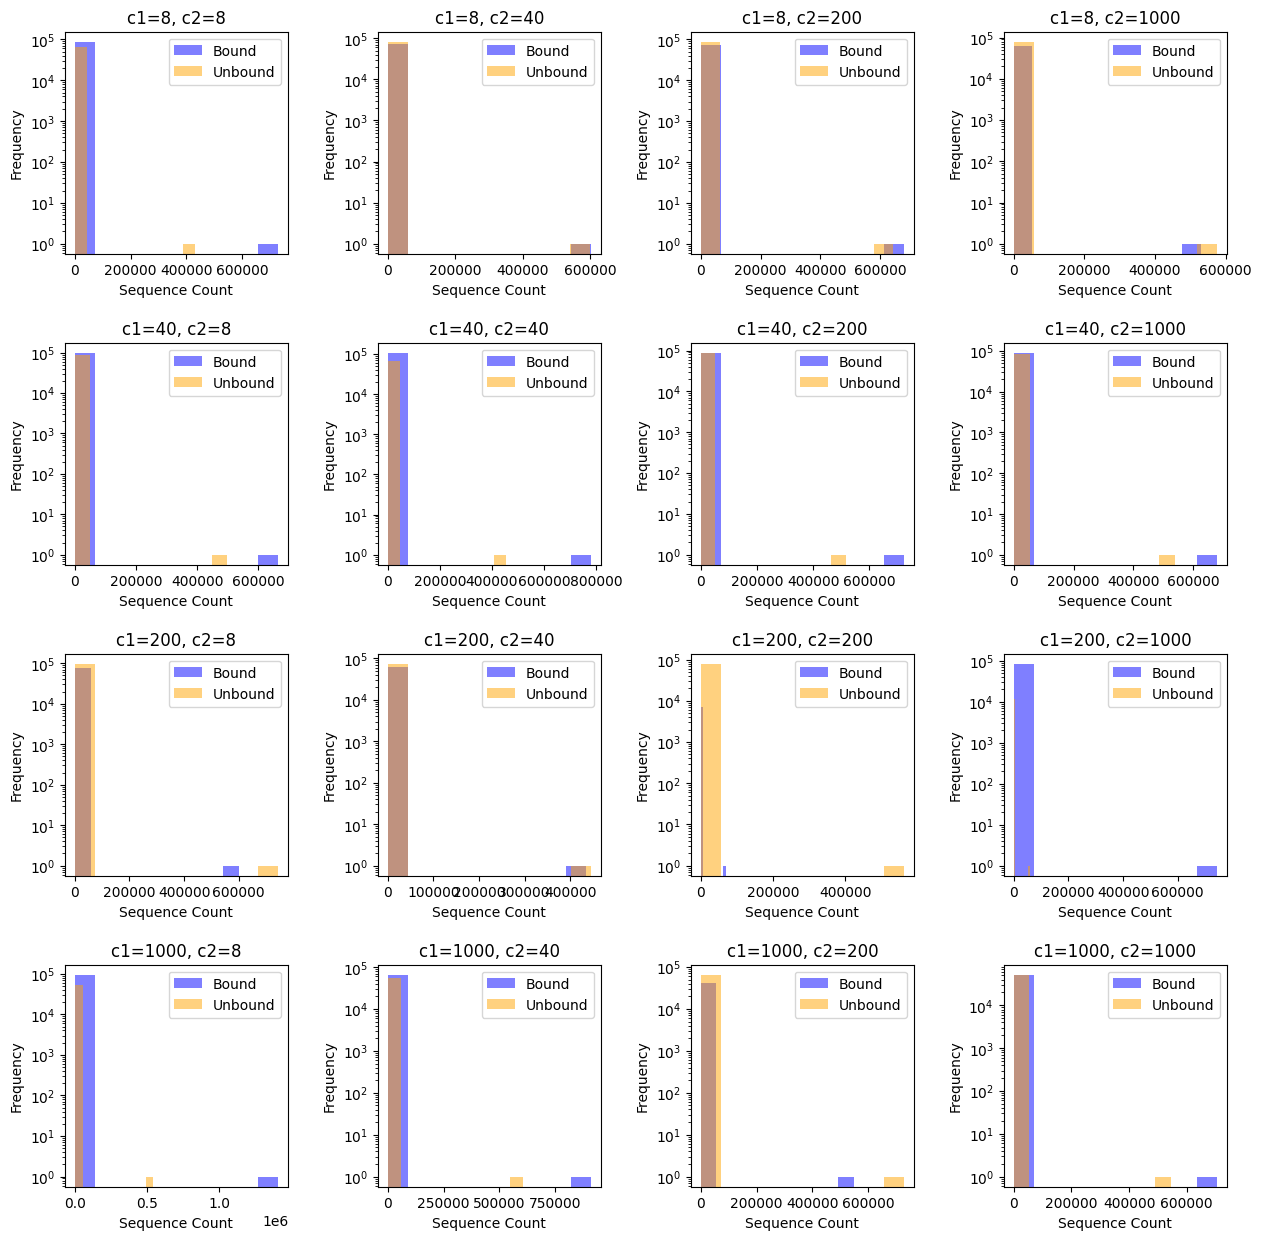

In [6]:
# setup 4 by 4 grid
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
# loop through all concentrations
for i, c1 in enumerate(protein_concentrations):
    for j, c2 in enumerate(protein_concentrations):
        # plot histogram of bound and unbound counts
        axs[i, j].hist(bound_counts[(c1,c2)], alpha=0.5, label='Bound', color='blue')
        axs[i, j].hist(unbound_counts[(c1,c2)], alpha=0.5, label='Unbound', color='orange')
        axs[i, j].set_title(f'c1={c1}, c2={c2}')
        axs[i, j].set_xlabel('Sequence Count')
        axs[i, j].set_ylabel('Frequency')
        # log scale the y-axis
        axs[i, j].set_yscale('log')
        axs[i, j].legend()
        
plt.show()

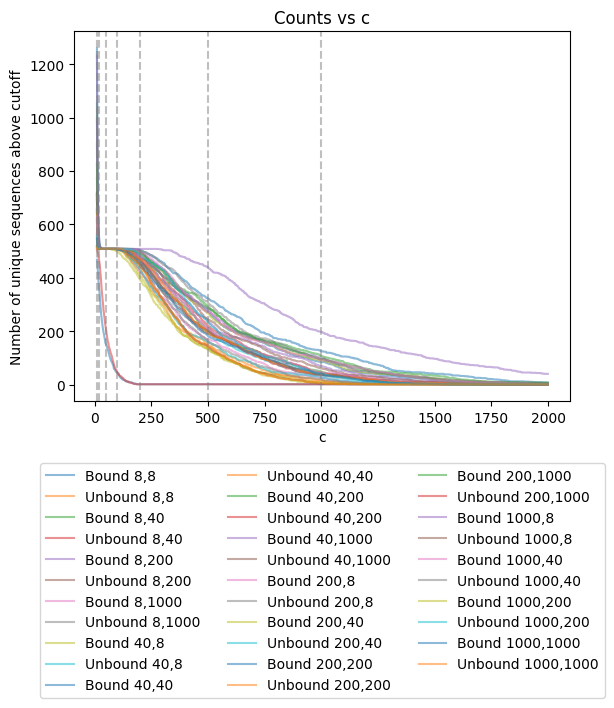

In [7]:
# for each pool plot number of counts > threshold vs theshold
thresholds = np.arange(10, 2000, 1)
bound_counts_above_threshold = {}
unbound_counts_above_threshold = {}
# loop through all concentrations
for c1 in protein_concentrations:
    for c2 in protein_concentrations:
        # get the bound and unbound counts
        bound_counts_above_threshold[(c1,c2)] = np.array([np.sum(bound_counts[(c1,c2)] > t) for t in thresholds])
        unbound_counts_above_threshold[(c1,c2)] = np.array([np.sum(unbound_counts[(c1,c2)] > t) for t in thresholds])
        # plot the number of counts above threshold
        plt.plot(thresholds, bound_counts_above_threshold[(c1,c2)], label=f'Bound {c1},{c2}', alpha=0.5)
        plt.plot(thresholds, unbound_counts_above_threshold[(c1,c2)], label=f'Unbound {c1},{c2}', alpha=0.5)

# vertical lines at 10, 20, 50, 100, 200, 500, 1000
for t in [10, 20, 50, 100, 200, 500, 1000]:
    plt.axvline(x=t, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('c')
plt.ylabel('Number of unique sequences above cutoff')
plt.title('Counts vs c')
# plot legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

In [8]:
# 200,200 and 200,1000 have weird counts!